In [1]:
# Imports
from telemetry.models import TelemetryItem
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Utility Functions
def get_frequency_of_events():
    events = TelemetryItem.objects.values('element').annotate(num_events=Count('element'))
    return events

def get_frequency_of_os():
    events = TelemetryItem.objects.values('os').annotate(num_os=Count('os'))
    return events

In [3]:
# Plotting Functions

# Frequency plot of number of events for each element
def plot_frequency_chart():
    counts = get_frequency_of_events()
    
    labels = []
    element_counts = []
    
    for event_counts in counts:
        element_counts.append(event_counts['num_events'])
        labels.append(event_counts['element'])
    
    indexes = np.arange(len(labels))
    width = 1
    

    plt.bar(indexes, element_counts, width)
    plt.xticks(rotation=70)
    plt.xticks(indexes + width * 0.10, labels)
    plt.ylabel('Counts')
    plt.xlabel('Element')
    plt.show()
    
# Pie chart showing Operating Systems used
def os_pie_chart():
    counts = get_frequency_of_os()
    
    labels = []
    os_counts = []
    
    for event in counts:
        os_counts.append(event['num_os'])
        labels.append(event['os'])
    
    colors = ['green', 'red', 'yellow', 'blue', 'orange']
    
    plt.pie(os_counts, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()

### Finding which element was clicked the most

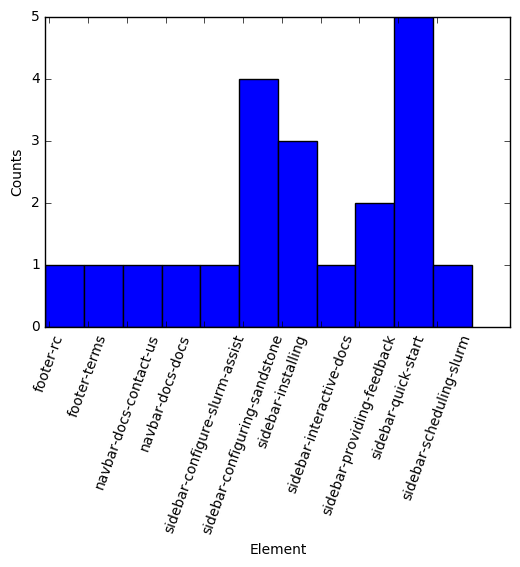

In [4]:
# Plot a Frequency chart of events on elements
plot_frequency_chart()

### Finding the OS which the users use

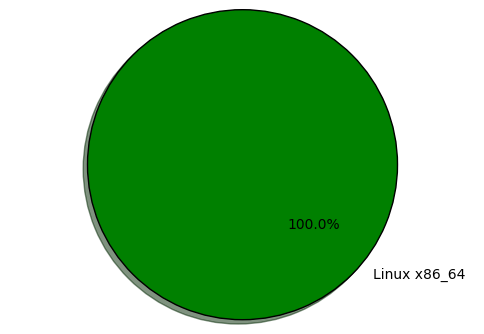

In [5]:
# Plot a pie chart showing OS usage
os_pie_chart()

In [20]:
# get unique session id's
session_ids = TelemetryItem.objects.values('session_id').distinct()

for session in session_ids:
    print 'SESSION ID %s' % (session['session_id'])
    # get all telemetry objects sorted by time in ascending order
    telemetry_objects = TelemetryItem.objects.filter(session_id=session['session_id']).order_by('timestamp')
    for telemetry_object in telemetry_objects:
        print "Event: %s, Element: %s, Location: %s" % (telemetry_object.event_type, telemetry_object.element, telemetry_object.location)
    print

SESSION ID 175e912fd41d4d3e8efcdbc585aafb7e
Event: click, Element: sidebar-quick-start, Location: /docs/
Event: click, Element: sidebar-quick-start, Location: /docs/
Event: click, Element: sidebar-quick-start, Location: /docs/
Event: click, Element: sidebar-quick-start, Location: /docs/
Event: click, Element: sidebar-quick-start, Location: /docs/
Event: click, Element: sidebar-configuring-sandstone, Location: /docs/
Event: click, Element: sidebar-configuring-sandstone, Location: /docs/
Event: click, Element: sidebar-configuring-sandstone, Location: /docs/
Event: click, Element: sidebar-configuring-sandstone, Location: /docs/

SESSION ID 7a64b5a9007a45ee9cad4a48202e5e80
Event: click, Element: sidebar-installing, Location: /docs/
Event: click, Element: sidebar-scheduling-slurm, Location: /docs/hpc/installation/
Event: click, Element: sidebar-installing, Location: /docs/user/scheduling-jobs-slurm/
Event: click, Element: sidebar-providing-feedback, Location: /docs/hpc/installation/
Event: 